DynaQ-Learning

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

  0%|          | 0/3 [00:00<?, ?it/s]

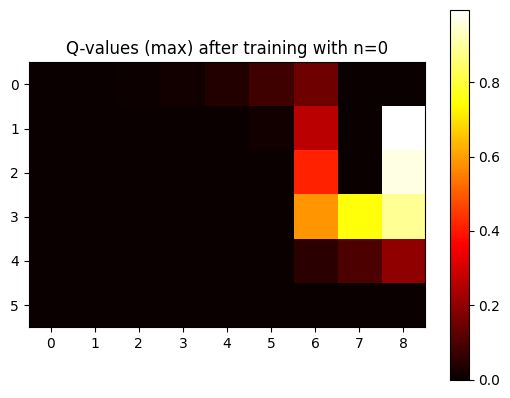

 33%|███▎      | 1/3 [04:52<09:44, 292.22s/it]

[[3 3 3 3 3 3 1 0 0]
 [0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 3 3 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]]


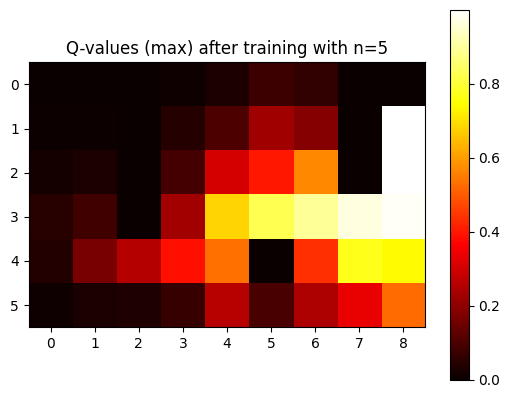

 67%|██████▋   | 2/3 [04:52<02:00, 120.45s/it]

[[1 3 3 1 1 1 1 0 0]
 [1 1 0 1 1 1 1 0 0]
 [1 1 0 3 1 1 1 0 0]
 [3 1 0 3 3 3 3 3 0]
 [3 3 3 3 0 0 3 0 0]
 [3 0 0 0 0 3 3 0 0]]


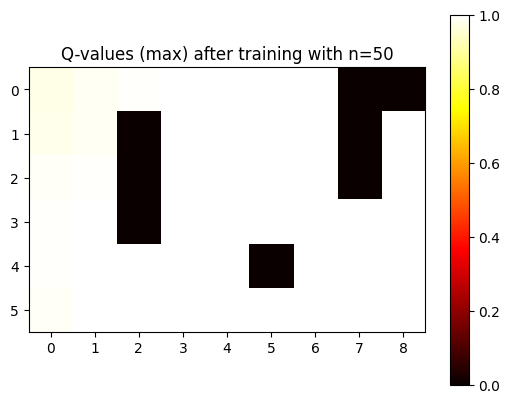

100%|██████████| 3/3 [04:53<00:00, 97.70s/it] 

[[3 3 3 1 1 1 1 0 0]
 [1 1 0 3 3 1 1 0 0]
 [3 1 0 1 1 1 1 0 0]
 [3 1 0 3 3 3 3 3 0]
 [3 3 3 0 0 0 0 3 0]
 [0 0 0 0 0 3 0 0 0]]


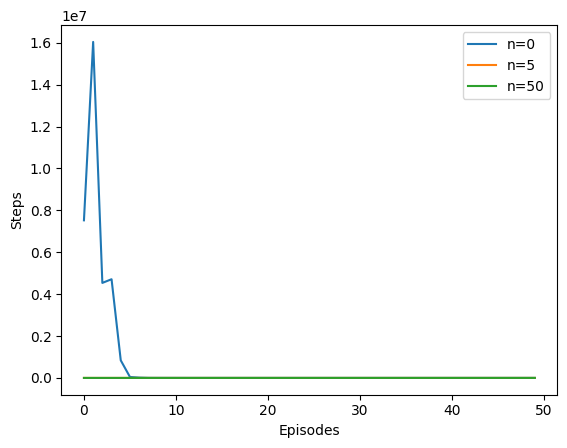

In [14]:
actions = [(-1, 0), (1, 0), (0, -1), (0, 1)]  # up, down, left, right
height = 6
width = 9
start = (2, 0)
goal = (0, 8)
blocks = [(1, 2), (2, 2), (3, 2), (0, 7), (1, 7), (2, 7), (4, 5)]
alpha = 0.1
epsilon = 0.1
gamma = 1

n_values = [0, 5, 50]

def move(state, action):
    new_state = (state[0] + action[0], state[1] + action[1])
    if new_state[0] < 0 or new_state[0] >= height or new_state[1] < 0 or new_state[1] >= width:
        return state
    if new_state in blocks:
        return state
    return new_state

def epsilon_greedy(state, q_values):
    if np.random.rand() < epsilon:
        return np.random.choice(len(actions))
    return np.argmax(q_values[state[0], state[1]])

def dyna_q(n):
    histories = []    
    q_values = np.zeros((height, width, len(actions)))
    for i in range(50):  # 50エピソード
        state = start
        counter = 0  # 各エピソードのステップ数をリセット
        while state != goal:
            action = epsilon_greedy(state, q_values)
            next_state = move(state, actions[action])
            reward = 1 if next_state == goal else 0
            q_values[state[0], state[1], action] += alpha * (
                reward + gamma * np.max(q_values[next_state[0], next_state[1]]) - q_values[state[0], state[1], action]
            )
            state = next_state
            counter += 1  # ステップをカウント

            # 計画ステップ
            for _ in range(n):
                plan_state = (np.random.randint(height), np.random.randint(width))
                if plan_state == goal or plan_state in blocks:
                    continue
                plan_action = np.random.randint(len(actions))
                plan_next_state = move(plan_state, actions[plan_action])
                plan_reward = 1 if plan_next_state == goal else 0
                q_values[plan_state[0], plan_state[1], plan_action] += alpha * (
                    plan_reward + gamma * np.max(q_values[plan_next_state[0], plan_next_state[1]]) - q_values[plan_state[0], plan_state[1], plan_action]
                )
        
        # エピソード終了後にステップ数を記録
        histories.append(counter)
    return q_values, histories


# 可視化
histories = []
for n in tqdm(n_values):
    q_values,history = dyna_q(n)
    plt.imshow(np.max(q_values, axis=2), cmap='hot', interpolation='nearest')
    plt.title(f'Q-values (max) after training with n={n}')
    plt.colorbar()
    plt.show()
    histories.append(history)
    print(np.argmax(q_values, axis=2))

# エピソードごとのステップ数の推移
plt.plot(histories[0], label=f'n={n_values[0]}')
plt.plot(histories[1], label=f'n={n_values[1]}')
plt.plot(histories[2], label=f'n={n_values[2]}')
plt.xlabel('Episodes')
plt.ylabel('Steps')
plt.legend()
plt.show()
